<a href="https://colab.research.google.com/github/SaniyaBubere/Bank-Marketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

### **Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/bank.csv")

### **Dataset First View**

In [4]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **Dataset Rows & Columns count**

In [5]:
# Get the number of rows and columns
rows, columns = df.shape

In [6]:
# Print the number of rows and columns
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  11162
Number of columns:  17


We have 11162 Rows and 17 Columns

### **Dataset Information**

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


We Don't have any Null Values in the Dataset

#### **Duplicate Values**

In [8]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()


False    11162
dtype: int64

We Don't have Duplicates Values in the Dataset

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **What did you know about your dataset?**

The dataset appears to be related to a marketing campaign for a bank, as it includes information about individuals who were contacted by the bank and whether or not they made a deposit. The dataset contains information about the individuals' age, job, marital status, education, default history, balance, housing status, loan status, contact method, month of contact, duration of contact, number of contacts during the campaign, number of days since the last contact from a previous campaign, number of previous contacts, and the outcome of the previous campaign.

## ***2. Understanding Your Variables***

In [10]:
#Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### **Check Unique Values for each variable.**

In [12]:
# Function to get all unique values
def get_all_unique_values(df):
  # Function to get all unique values
    for col in df.columns:
        print(f"Unique values in column '{col}':")
        print(df[col].unique())
        print()

In [13]:
# Get and print all unique values
get_all_unique_values(df)

Unique values in column 'age':
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]

Unique values in column 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Unique values in column 'marital':
['married' 'single' 'divorced']

Unique values in column 'education':
['secondary' 'tertiary' 'primary' 'unknown']

Unique values in column 'default':
['no' 'yes']

Unique values in column 'balance':
[2343   45 1270 ... 1594 2593 -134]

Unique values in column 'housing':
['yes' 'no']

Unique values in column 'loan':
['no' 'yes']

Unique values in column 'contact':
['unknown' 'cellular' 'telephone']

Unique values in column 'day':
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 1

### **Variables Description** 

age: the age of the individual contacted by the bank (numeric)

job: Type of job the individual has (categorical: 'admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'self-employed', 'student')

marital: Marital status of the individual (categorical: 'married', 'single', 'divorced')

education:level of education of the individual (categorical: 'primary', 'secondary', 'tertiary', 'unknown')

default: Individual's has a history of defaulting on credit (binary: 'yes', 'no')

balance: Current balance in the individual's bank account (numeric)

housing: Individual has a housing loan or not (binary: 'yes', 'no')

loan:  Individual has a personal loan or not (binary: 'yes', 'no')

contact: the method of communication used to contact the individual (categorical: 'unknown', 'telephone', 'cellular')

day: the day of the month when the individual was last contacted (numeric)

month: the month of the year when the individual was last contacted (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

duration: the duration of the last contact with the individual (numeric, in seconds)

campaign: The "campaign" column represents the number of times the bank has made contact with a particular individual during the current marketing campaign. Each time the bank reaches out to the individual by phone, email, or another method of communication, it counts as one "contact".

For example, if the bank called a person twice and sent them an email once during the current marketing campaign, then the value in the "campaign" column for that person would be 3.

pdays: the number of days that passed since the individual was last contacted by the bank in a previous campaign (numeric, -1 indicates that the individual was not previously contacted)

previous: the number of contacts performed before this campaign for this individual (numeric)

poutcome: the outcome of the previous marketing campaign for this individual (categorical: 'unknown', 'other', 'failure', 'success')

deposit: whether or not the individual made a deposit (binary: 'yes', 'no')

In [14]:
df["marital"].value_counts(normalize = True)

married     0.568984
single      0.315176
divorced    0.115839
Name: marital, dtype: float64

As we can see, 57% (0.56) of clients are married, which must be taken into account when planning marketing campaigns to manage deposit operations.

In [15]:
df["deposit"].value_counts(normalize = True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [16]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3494,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
2498,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
2935,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
2654,18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
2464,18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes


We see that the youngest customers are at the age of 18, and the call duration exceeded 7 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

In [17]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
271,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
7198,30,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,-1,0,unknown,no
883,36,self-employed,single,tertiary,no,-103,yes,yes,telephone,17,oct,3253,1,-1,0,unknown,yes
358,28,admin.,single,secondary,no,-7,no,yes,unknown,26,jun,3183,2,-1,0,unknown,yes
4364,53,admin.,married,secondary,no,849,yes,no,cellular,6,feb,3102,3,-1,0,unknown,yes



The sorting results show that the longest calls exceed one hour, as the value duration is more than 3600 seconds or 1 hour. At the same time, it usually was on Mondays and Thursdays (day_of_week) and, especially, in November and August (month

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
df.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance        81204
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        3881
campaign          63
pdays            854
previous          58
poutcome     unknown
deposit          yes
dtype: object

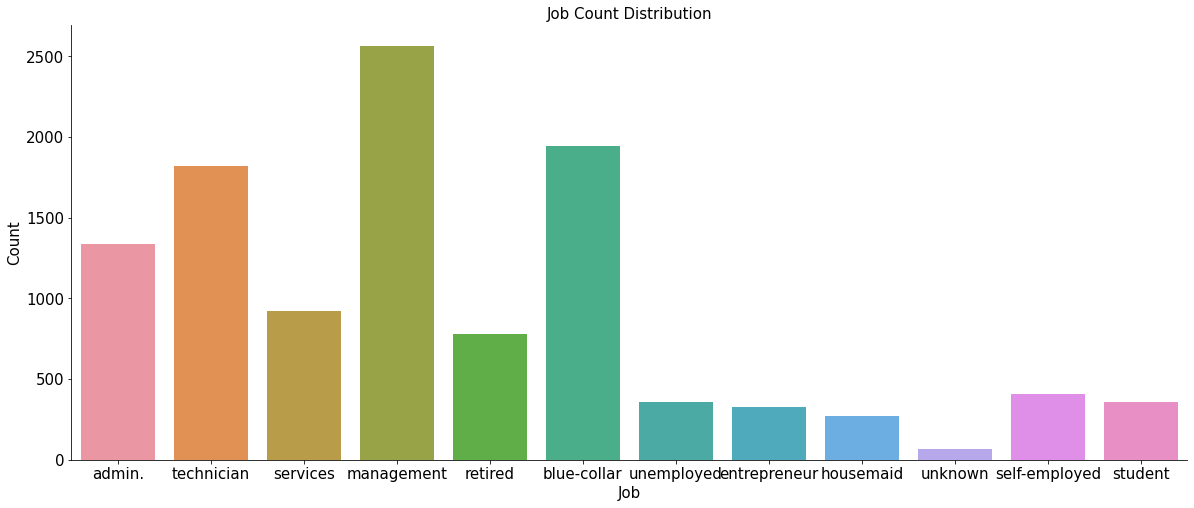

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [20]:
# Define a function to categorize jobs
def categorize_job(job):
    if job in ['admin.', 'management', 'entrepreneur']:
        return 'white collar'
    elif job in ['blue-collar', 'housemaid']:
        return 'blue collar'
    else:
        return 'other'

# Apply the function to the "job" column and create a new "job_category" column
df['job_category'] = df['job'].apply(categorize_job)

Blue collar workers are those who perform manual labor or skilled trade jobs that often involve physical work and are typically performed in a manufacturing or industrial setting. Examples include factory workers, construction workers, and mechanics..

White collar workers are those who work in an office, professional, managerial, or administrative work, typically performed in an office or corporate setting. Examples include accountants, engineers, managers, and lawyers.

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,job_category
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,white collar
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,white collar
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,other
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,other
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,white collar


In [22]:
df.drop(["job"],axis=1,inplace=True)

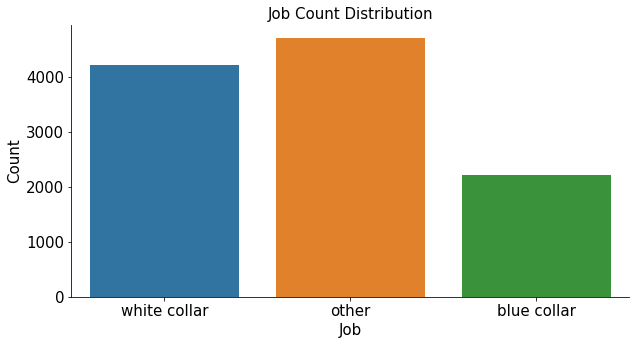

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'job_category', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

<Axes: xlabel='age', ylabel='Count'>

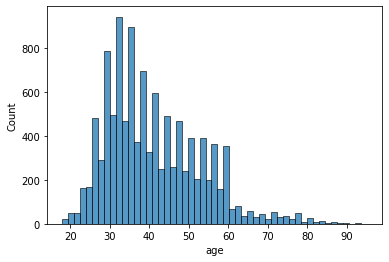

In [25]:
sns.histplot(data = df, x='age')

In [26]:
#Count customers age > 60
df[df['age'] > 60].count()['age']

611

In [27]:
#Age > 69 in %
a = df[df['age'] > 60].count()['age']
b = df.count()['age']

print('The % of customers with age > 60 is', round((a/b)*100, 2))

The % of customers with age > 60 is 5.47


In [28]:
#Age < 60 in %
c = df[df['age'] < 60].count()['age']
b = df.count()['age']

print('The % of customers with age < 60 is', round((c/b)*100, 2))

The % of customers with age < 60 is 93.01


In [30]:
import plotly.express as px

In [35]:
#Checking age dispersion
plt.figure(figsize=[20, 8])
colors = {'married':'#fbceb1', 'single':'#b2c7c8', 'divorced':'#ff5a68'}
px.histogram(df[df['age'] > 60], x='age', color='marital', color_discrete_map=colors)

<Figure size 1440x576 with 0 Axes>

In [40]:
#Checking age dispersion
plt.figure(figsize=[20, 8])
colors = {'yes':'#a2c892', 'no':'#05c4bc'}
px.histogram(df[df['age'] > 60], x='age', color='loan', color_discrete_map=colors)

<Figure size 1440x576 with 0 Axes>

In [42]:
#Checking age dispersion
plt.figure(figsize=[20, 8])
colors = {'yes':"#fa8072","no":"#559a90"}
px.histogram(df[df['age'] > 60], x='age', color='housing',color_discrete_map=colors)

<Figure size 1440x576 with 0 Axes>

UFuncTypeError: ignored